50


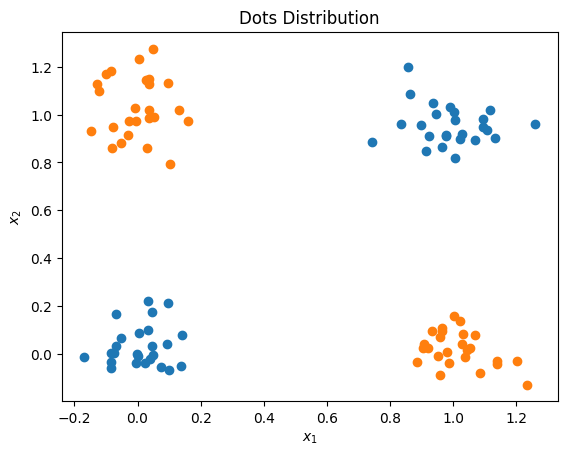

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

x_real = pd.read_csv('XXOR.csv')
y_real = pd.read_csv('yXOR.csv')

x0_real = x_real[y_real['Output']==0]
x1_real = x_real[y_real['Output']==1]
plt.scatter(x0_real['Input 1'], x0_real['Input 2'])
plt.scatter(x1_real['Input 1'], x1_real['Input 2'])
plt.title('Dots Distribution')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [7]:
import random
import numpy as np

def perceptron(x,w):
    xx = np.array(x)
    ww = np.array(w)
    z = int(np.dot(ww,np.transpose(xx)))
    return activation_function(z)
    
def activation_function(z):
    if z >= 0:
        return 1
    else:
        return -1
    
def random_weights(l):
    weights = [random.randint(0, 7) for _ in range(l)]
    return weights

def accuracy(yi, y):
    correctos = 0
    for i in range(len(yi)):
        if yi[i] == y[i]:
            correctos = correctos + 1
    return correctos/(len(yi) + 1)

In [13]:
# Algoritmo de batch
epoch = 100
n = 0.2

xReal = x_real.values.tolist()
xReal = [[1] + xi for xi in xReal]
yReal = y_real.values.tolist()
yReal = [yi for list in yReal for yi in list]

w = random_weights(len(xReal[0]))
yPred= []
acc = []

for _ in range(epoch):
    yPred.clear()
    for xi in xReal:
        yi = perceptron(xi,w)
        yPred.append(yi)

    for i in range(len(yReal)):
        xri = np.array(xReal[i])
        wnp = np.array(w)
        wnp = wnp + n*(yReal[i] - yPred[i])*xri
        w = wnp.tolist()
    acc.append(accuracy(yPred, yReal))

El accuracy final del modelo es:  0.49504950495049505
Los pesos encontrados fueron: 
w_0: 0.40000000000076236
w_1: 5.365915706007162
w_2: 11.20569512851625


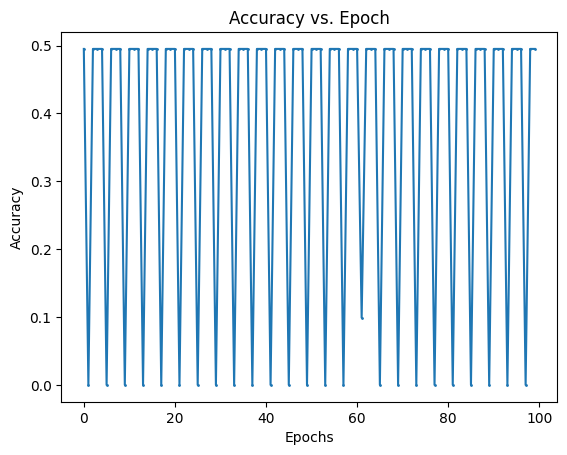

In [14]:
print('El accuracy final del modelo es: ', accuracy(yPred, yReal))
print('Los pesos encontrados fueron: ')

for i in range(len(w)):
    print('w_' + str(i) + ': ' + str(w[i]))

plt.scatter(list(range(0,100)), acc, s=1)
plt.plot(list(range(0,100)), acc)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')

plt.show()

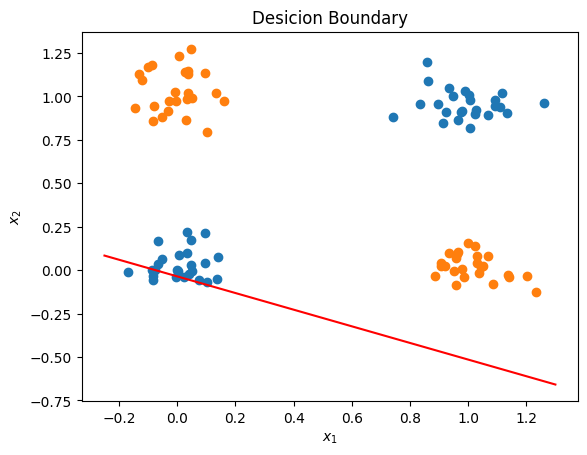

In [18]:
c1 = w[0]/-w[2]
c2 = w[1]/-w[2]

x_line = np.linspace(-0.25,1.3,5)
y_line = c1 + c2*x_line

plt.scatter(x0_real['Input 1'], x0_real['Input 2'])
plt.scatter(x1_real['Input 1'], x1_real['Input 2'])
plt.plot(x_line, y_line, color='r')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Desicion Boundary')
plt.show()

# Visualizacion de los datos en 3D

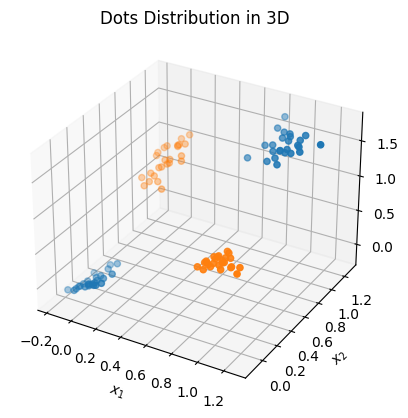

In [21]:
x_real['x1^2'] = np.sin(x_real['Input 1'])
x_real['x2^2'] = np.sin(x_real['Input 2'])
x_real['z'] = x_real['x1^2'] + x_real['x2^2']

x1 = x_real[y_real['Output'] == 0]
x2 = x_real[y_real['Output'] == 1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1['Input 1'], x1['Input 2'], x1['z'])
ax.scatter(x2['Input 1'], x2['Input 2'], x2['z'])

plt.title('Dots Distribution in 3D')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$z$')

plt.show()

In [28]:
epoch = 100
n = 0.2

xReal = x_real[['Input 1', 'Input 2']].values.tolist()
xReal = [[1] + xi for xi in xReal]
yReal = y_real.values.tolist()
yReal = [yi for list in yReal for yi in list]

w = random_weights(len(xReal[0]))
yPred= []
acc = []

for _ in range(epoch):
    for i in range(len(xReal)):
        yi = perceptron(xReal[i],w)
        yPred.append(yi)
        xri = np.array(xReal[i])
        wnp = np.array(w)
        wnp = wnp + n*(yReal[i] - yPred[i])*xri
        w = wnp.tolist()
    acc.append(accuracy(yPred, yReal))
    yPred.clear()

El accuracy final del modelo es:  0.48514851485148514
Los pesos encontrados fueron: 
w_0: -0.8000000000000032
w_1: 0.15111828595008422
w_2: 0.0037198246090858478


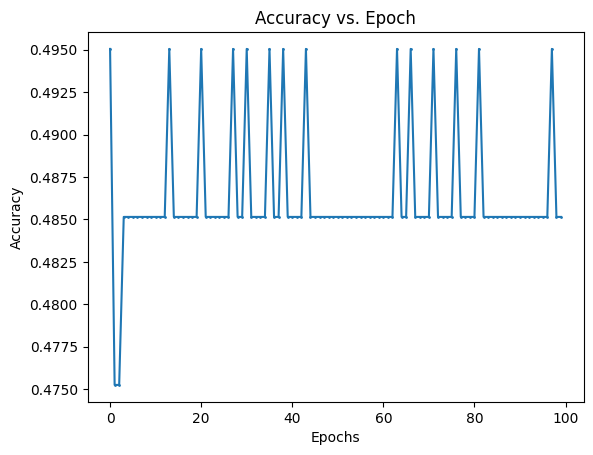

In [29]:
print('El accuracy final del modelo es: ', acc[-1])
print('Los pesos encontrados fueron: ')

for i in range(len(w)):
    print('w_' + str(i) + ': ' + str(w[i]))

plt.scatter(list(range(0,100)), acc, s=1)
plt.plot(list(range(0,100)), acc)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')

plt.show()

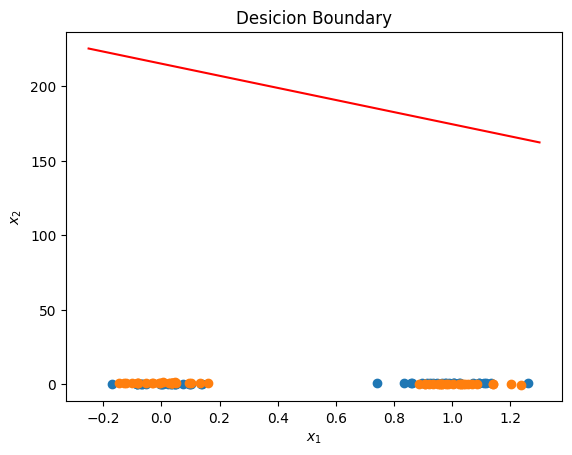

In [32]:
c1 = w[0]/-w[2]
c2 = w[1]/-w[2]

x_line = np.linspace(-0.25,1.3,5)
y_line = c1 + c2*x_line

plt.scatter(x0_real['Input 1'], x0_real['Input 2'])
plt.scatter(x1_real['Input 1'], x1_real['Input 2'])
plt.plot(x_line, y_line, color='r')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Desicion Boundary')
plt.show()